In [1]:
import sqlite3
import numpy as np
import pandas as pd

In [2]:
 # Making a connection between sqlite3 
    # database and Python Program
sqlConnection = sqlite3.connect('data.db')

In [3]:
balances_query = "SELECT * FROM balances" 
balances_query_df = pd.read_sql_query(balances_query, sqlConnection)

client_query = "SELECT * FROM client" 
client_df = pd.read_sql_query(client_query, sqlConnection)

client_products_query = "SELECT * FROM client_products" 
client_products_df = pd.read_sql_query(client_products_query, sqlConnection)

inv_camp_query = "SELECT * FROM inv_campaign_eval" 
inv_camp_df = pd.read_sql_query(inv_camp_query, sqlConnection)


In [4]:
balances_query_df.shape

(290212, 4)

In [5]:
balances_query_df.dtypes

date          object
balance      float64
client_id      int64
currency      object
dtype: object

In [6]:
client_df.dtypes

client_id      int64
age          float64
job           object
marital       object
education     object
gender        object
dtype: object

In [7]:
client_products_df.dtypes

client_id         int64
has_deposits     object
loan             object
has_insurance    object
has_mortgage     object
dtype: object

In [8]:
inv_camp_df.dtypes

client_id     int64
poutcome     object
dtype: object

In [9]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  11162 non-null  int64  
 1   age        10930 non-null  float64
 2   job        10724 non-null  object 
 3   marital    11162 non-null  object 
 4   education  11162 non-null  object 
 5   gender     11162 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 523.3+ KB


In [10]:
# Check for missing values in each column
client_df.isnull().sum()

client_id      0
age          232
job          438
marital        0
education      0
gender         0
dtype: int64

In [11]:
inv_camp_df

,client_id,poutcome
0,249789938,success
1,1504633819,failure
2,1952195738,success
3,989726384,success
4,1971878545,failure
...,...,...
2294,1270855655,failure
2295,471724023,success
2296,620088171,failure
2297,1518319265,success


In [12]:
client_products_df.isnull().sum()

client_id        0
has_deposits     0
loan             0
has_insurance    0
has_mortgage     0
dtype: int64

In [13]:
client_df['age'] = client_df['age'].fillna(client_df['age'].median())
print(client_df)
client_df.isnull().sum()

        client_id   age            job   marital  education gender
0       249789938  38.0       services   married  secondary      M
1      1222646323  46.0       services  divorced    unknown      M
2       451375919  33.0         admin.    single  secondary      F
3       338972671  44.0  self-employed   married  secondary      F
4      1472834688  36.0    blue-collar   married    primary      M
...           ...   ...            ...       ...        ...    ...
11157   543198889  40.0    blue-collar    single    unknown      M
11158   458558558  41.0      housemaid  divorced    primary      F
11159  1426334329  59.0     technician   married    primary      F
11160   831035343  42.0     management   married   tertiary      M
11161   705801685  36.0    blue-collar    single  secondary      F

[11162 rows x 6 columns]


client_id      0
age            0
job          438
marital        0
education      0
gender         0
dtype: int64

In [14]:
new_client_df = client_df.drop('job', axis=1)

print(new_client_df)
new_client_df.isnull().sum()

        client_id   age   marital  education gender
0       249789938  38.0   married  secondary      M
1      1222646323  46.0  divorced    unknown      M
2       451375919  33.0    single  secondary      F
3       338972671  44.0   married  secondary      F
4      1472834688  36.0   married    primary      M
...           ...   ...       ...        ...    ...
11157   543198889  40.0    single    unknown      M
11158   458558558  41.0  divorced    primary      F
11159  1426334329  59.0   married    primary      F
11160   831035343  42.0   married   tertiary      M
11161   705801685  36.0    single  secondary      F

[11162 rows x 5 columns]


client_id    0
age          0
marital      0
education    0
gender       0
dtype: int64

In [15]:
client_products_df = client_products_df.replace(['n'], 'no')

In [16]:
client_products_df = client_products_df.replace(['y'], 'yes')


In [17]:
print(client_products_df)

        client_id has_deposits loan has_insurance has_mortgage
0       249789938          yes   no            no           no
1      1222646323           no   no            no           no
2       451375919           no   no            no          yes
3       338972671           no   no           yes          yes
4      1472834688          yes   no            no          yes
...           ...          ...  ...           ...          ...
11157   543198889           no   no            no          yes
11158   458558558           no   no            no          yes
11159  1426334329           no   no           yes          yes
11160   831035343           no   no            no           no
11161   705801685          yes   no            no          yes

[11162 rows x 5 columns]


In [18]:
new_client_df['age'] = new_client_df['age'].astype(int)
print(new_client_df)

        client_id  age   marital  education gender
0       249789938   38   married  secondary      M
1      1222646323   46  divorced    unknown      M
2       451375919   33    single  secondary      F
3       338972671   44   married  secondary      F
4      1472834688   36   married    primary      M
...           ...  ...       ...        ...    ...
11157   543198889   40    single    unknown      M
11158   458558558   41  divorced    primary      F
11159  1426334329   59   married    primary      F
11160   831035343   42   married   tertiary      M
11161   705801685   36    single  secondary      F

[11162 rows x 5 columns]


In [19]:
sqliteConnection = sqlite3.connect('data.db')
sql_query = """SELECT name FROM sqlite_master  
  WHERE type='table';"""
cursor = sqliteConnection.cursor()
cursor.execute(sql_query)
print(cursor.fetchall())

[('balances',), ('client_products',), ('client',), ('inv_campaign_eval',)]


In [20]:
balances_query = """SELECT * FROM balances"""
balances_df = pd.read_sql_query(balances_query, sqliteConnection)

In [21]:
balances_df.currency.unique()
balances_df.currency.isnull().values.any()

False

In [22]:
df_balances = balances_df
print(df_balances)

                              date      balance  client_id currency
0       2023-06-06 16:21:15.291346  2680.467773  249789938      CZK
1       2023-05-23 16:21:15.291346  2654.055419  249789938      CZK
2       2023-05-09 16:21:15.291346  2620.835872  249789938      CZK
3       2023-04-25 16:21:15.291346  2720.315925  249789938      CZK
4       2023-04-11 16:21:15.291346  2687.601982  249789938      CZK
...                            ...          ...        ...      ...
290207  2022-08-16 16:22:46.440217   145.454161  705801685      CZK
290208  2022-08-02 16:22:46.440217    -5.497494  705801685      CZK
290209  2022-07-19 16:22:46.440217   -45.891607  705801685      CZK
290210  2022-07-05 16:22:46.440217    19.473946  705801685      CZK
290211  2022-06-21 16:22:46.440217   163.032053  705801685      CZK

[290212 rows x 4 columns]


In [23]:
df_balance_new = df_balances.copy()
df_balance_new.loc[df_balance_new['balance'] == 'USD', 'currency':] *= 23
df_balance_new.loc[df_balance_new['currency'] == 'USD', 'currency'] = "CZK"
df_balance_new.loc[df_balance_new['balance'] == 'EUR', 'currency':] *= 25
df_balance_new.loc[df_balance_new['currency'] == 'EUR', 'currency'] = "CZK"
print(df_balance_new)

                              date      balance  client_id currency
0       2023-06-06 16:21:15.291346  2680.467773  249789938      CZK
1       2023-05-23 16:21:15.291346  2654.055419  249789938      CZK
2       2023-05-09 16:21:15.291346  2620.835872  249789938      CZK
3       2023-04-25 16:21:15.291346  2720.315925  249789938      CZK
4       2023-04-11 16:21:15.291346  2687.601982  249789938      CZK
...                            ...          ...        ...      ...
290207  2022-08-16 16:22:46.440217   145.454161  705801685      CZK
290208  2022-08-02 16:22:46.440217    -5.497494  705801685      CZK
290209  2022-07-19 16:22:46.440217   -45.891607  705801685      CZK
290210  2022-07-05 16:22:46.440217    19.473946  705801685      CZK
290211  2022-06-21 16:22:46.440217   163.032053  705801685      CZK

[290212 rows x 4 columns]


In [24]:
df_balance_new.currency.unique()


array(['CZK'], dtype=object)

In [25]:
filtered_df = df_balance_new[(df_balance_new['date'] >= '2023-03-01') & (df_balance_new['date'] <= '2023-06-30')]
print(filtered_df)


                              date      balance  client_id currency
0       2023-06-06 16:21:15.291346  2680.467773  249789938      CZK
1       2023-05-23 16:21:15.291346  2654.055419  249789938      CZK
2       2023-05-09 16:21:15.291346  2620.835872  249789938      CZK
3       2023-04-25 16:21:15.291346  2720.315925  249789938      CZK
4       2023-04-11 16:21:15.291346  2687.601982  249789938      CZK
...                            ...          ...        ...      ...
290188  2023-05-09 16:22:46.440217    40.666162  705801685      CZK
290189  2023-04-25 16:22:46.440217     8.617271  705801685      CZK
290190  2023-04-11 16:22:46.440217    84.358039  705801685      CZK
290191  2023-03-28 16:22:46.440217   -16.975446  705801685      CZK
290192  2023-03-14 16:22:46.440217    16.844223  705801685      CZK

[78134 rows x 4 columns]


In [26]:
sum_balances = filtered_df.groupby('client_id')['balance'].sum()

# Divide each sum by 7 and create a new DataFrame
average_balances_df = pd.DataFrame({'client_id': sum_balances.index, 'average_balance': sum_balances.values / 7})

# Print the result
print(average_balances_df)

        client_id  average_balance
0       100070076       214.655340
1       100141910      2533.575687
2       100207570       -10.465497
3       100488560       366.843373
4       100605013       409.905114
...           ...              ...
11157  1999463182      1241.009897
11158  1999499145       -17.706274
11159  1999715381       703.327991
11160  1999945413      5035.928297
11161  1999956516       238.364484

[11162 rows x 2 columns]


In [27]:
contacted_customers = pd.merge(pd.merge(pd.merge(inv_camp_df, average_balances_df, on='client_id', how='inner'), client_products_df, on='client_id', how='inner'), new_client_df, on='client_id', how='inner')
print(contacted_customers)

       client_id poutcome  average_balance has_deposits loan has_insurance  \
0      249789938  success      2673.410334          yes   no            no   
1     1504633819  failure      5426.688121           no  yes            no   
2     1952195738  success      2896.273313          yes  yes            no   
3      989726384  success      3115.820938          yes   no            no   
4     1971878545  failure       492.085398          yes   no            no   
...          ...      ...              ...          ...  ...           ...   
2294  1270855655  failure      3346.954717          yes   no           yes   
2295   471724023  success      4616.418247          yes   no            no   
2296   620088171  failure       904.070704          yes   no           yes   
2297  1518319265  success        84.907674          yes   no            no   
2298   705801685  success        15.163881          yes   no            no   

     has_mortgage  age   marital  education gender  
0         

In [28]:
contacted_customers = contacted_customers.replace(['no'], '0')

In [29]:
contacted_customers = contacted_customers.replace(['yes'], '1')

In [30]:
contacted_customers

,client_id,poutcome,average_balance,has_deposits,loan,has_insurance,has_mortgage,age,marital,education,gender
0,249789938,success,2673.410334,1,0,0,0,38,married,secondary,M
1,1504633819,failure,5426.688121,0,1,0,1,38,married,tertiary,M
2,1952195738,success,2896.273313,1,1,0,0,34,married,secondary,M
3,989726384,success,3115.820938,1,0,0,0,62,married,secondary,F
4,1971878545,failure,492.085398,1,0,0,0,36,single,tertiary,M
...,...,...,...,...,...,...,...,...,...,...,...
2294,1270855655,failure,3346.954717,1,0,1,1,58,divorced,secondary,F
2295,471724023,success,4616.418247,1,0,0,0,72,married,primary,M
2296,620088171,failure,904.070704,1,0,1,1,34,married,tertiary,F
2297,1518319265,success,84.907674,1,0,0,0,39,married,unknown,F


In [31]:
contacted_customers = contacted_customers.replace(['success'], '1')

In [32]:
contacted_customers = contacted_customers.replace(['failure'], '0')

In [33]:
contacted_customers = contacted_customers.replace(['married'], '1')

In [34]:
contacted_customers = contacted_customers.replace(['yes'], '1')

In [35]:
contacted_customers = contacted_customers.replace(['divorced'], '0')
contacted_customers = contacted_customers.replace(['single'], '0')

In [36]:
contacted_customers

,client_id,poutcome,average_balance,has_deposits,loan,has_insurance,has_mortgage,age,marital,education,gender
0,249789938,1,2673.410334,1,0,0,0,38,1,secondary,M
1,1504633819,0,5426.688121,0,1,0,1,38,1,tertiary,M
2,1952195738,1,2896.273313,1,1,0,0,34,1,secondary,M
3,989726384,1,3115.820938,1,0,0,0,62,1,secondary,F
4,1971878545,0,492.085398,1,0,0,0,36,0,tertiary,M
...,...,...,...,...,...,...,...,...,...,...,...
2294,1270855655,0,3346.954717,1,0,1,1,58,0,secondary,F
2295,471724023,1,4616.418247,1,0,0,0,72,1,primary,M
2296,620088171,0,904.070704,1,0,1,1,34,1,tertiary,F
2297,1518319265,1,84.907674,1,0,0,0,39,1,unknown,F


In [37]:
contacted_customers.age.unique()

array([38, 34, 62, 36, 56, 39, 44, 30, 74, 27, 59, 35, 37, 46, 51, 26, 47,
       31, 80, 45, 53, 43, 57, 29, 52, 33, 23, 82, 50, 41, 58, 42, 40, 25,
       28, 49, 67, 55, 48, 19, 61, 60, 63, 73, 54, 65, 21, 71, 78, 75, 77,
       32, 93, 72, 64, 76, 66, 24, 22, 84, 70, 68, 20, 81, 69, 83, 79, 18,
       86])

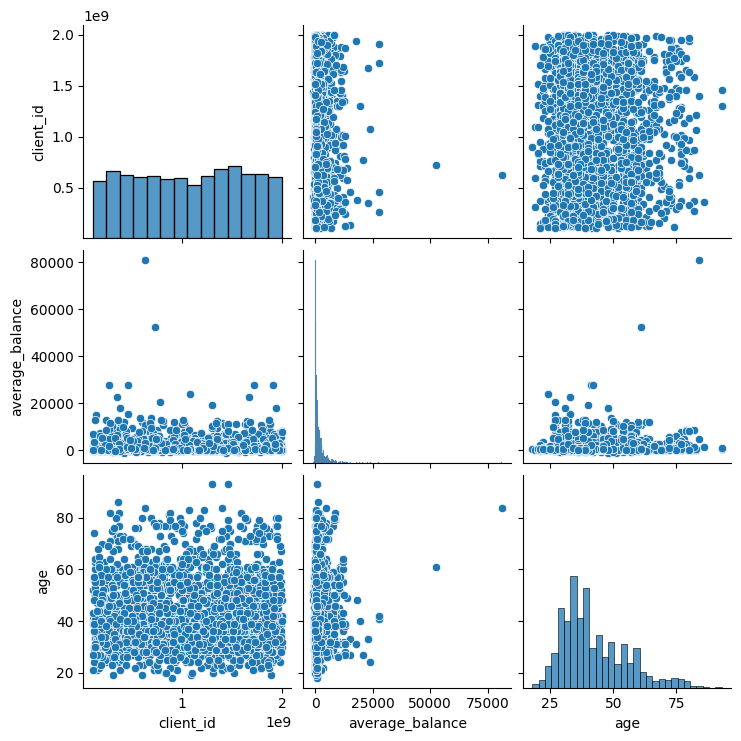

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(contacted_customers)

In [39]:
contacted_customers.dtypes

client_id            int64
poutcome            object
average_balance    float64
has_deposits        object
loan                object
has_insurance       object
has_mortgage        object
age                  int64
marital             object
education           object
gender              object
dtype: object

In [40]:
contacted_customers.head()

,client_id,poutcome,average_balance,has_deposits,loan,has_insurance,has_mortgage,age,marital,education,gender
0,249789938,1,2673.410334,1,0,0,0,38,1,secondary,M
1,1504633819,0,5426.688121,0,1,0,1,38,1,tertiary,M
2,1952195738,1,2896.273313,1,1,0,0,34,1,secondary,M
3,989726384,1,3115.820938,1,0,0,0,62,1,secondary,F
4,1971878545,0,492.085398,1,0,0,0,36,0,tertiary,M


In [41]:
df_0, df_1 = [x for _, x in contacted_customers.groupby(contacted_customers['poutcome'])]

/var/folders/xj/068390md7n9bl08pk518n9nw0000gn/T/ipykernel_8135/208483296.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_1['age'], bins=40, palette='viridis')


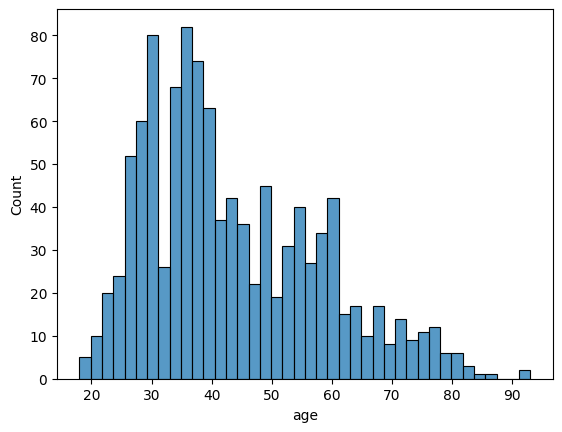

In [42]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
# Box plot of Fare versus Survival

sns.histplot(df_1['age'], bins=40, palette='viridis')
plt.show()

/var/folders/xj/068390md7n9bl08pk518n9nw0000gn/T/ipykernel_8135/1723850781.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=contacted_customers, x='has_deposits', y='age', palette='viridis')


<Axes: xlabel='has_deposits', ylabel='age'>

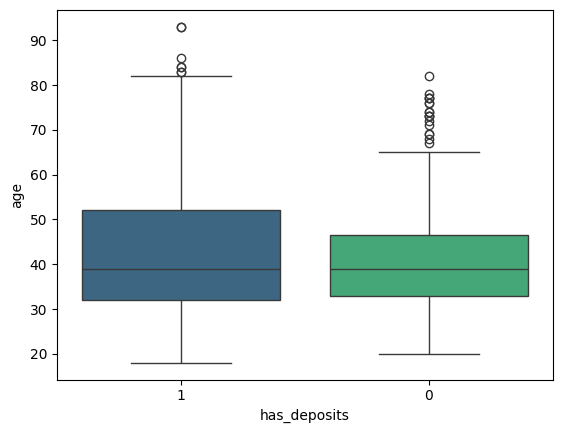

In [43]:
#figure deposits and age
sns.boxplot(data=contacted_customers, x='has_deposits', y='age', palette='viridis')

/var/folders/xj/068390md7n9bl08pk518n9nw0000gn/T/ipykernel_8135/1908089097.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=contacted_customers, x='poutcome', y='age', palette='viridis')


<Axes: xlabel='poutcome', ylabel='age'>

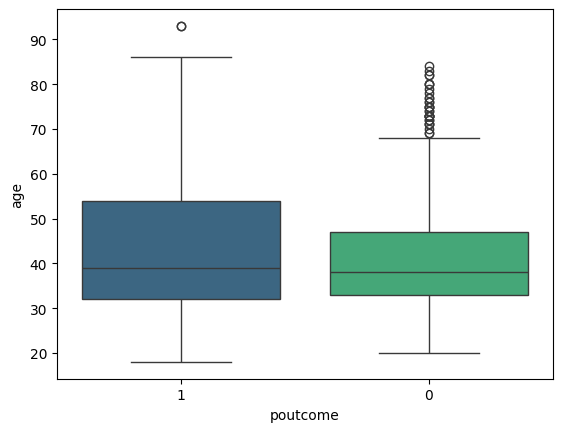

In [44]:
#figure poutcome and age
sns.boxplot(data=contacted_customers, x='poutcome', y='age', palette='viridis')

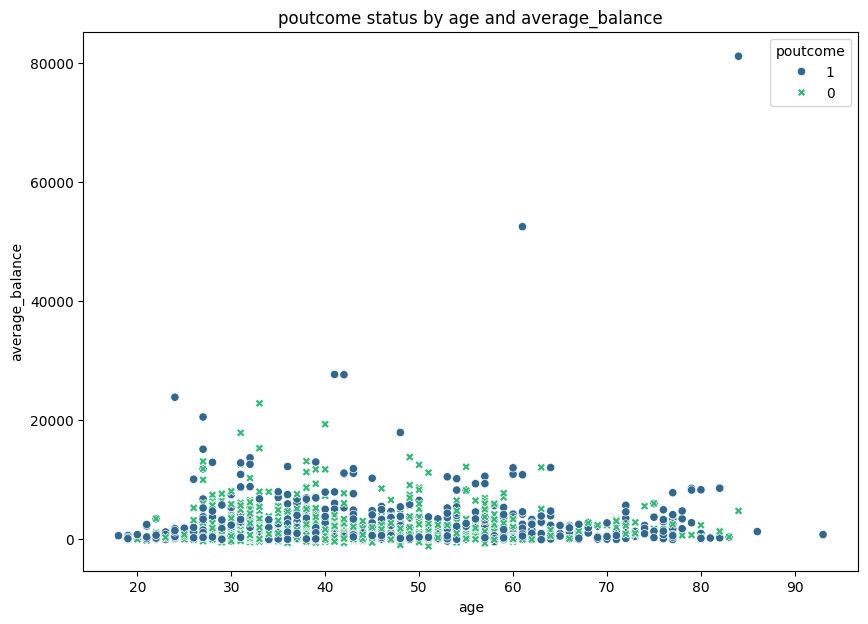

In [45]:
# Scatter plot of contacted_costumers
plt.figure(figsize=(10, 7))
sns.scatterplot(data=contacted_customers, x='age', y='average_balance', hue='poutcome', style='poutcome', palette='viridis')
plt.title('poutcome status by age and average_balance')
plt.show()

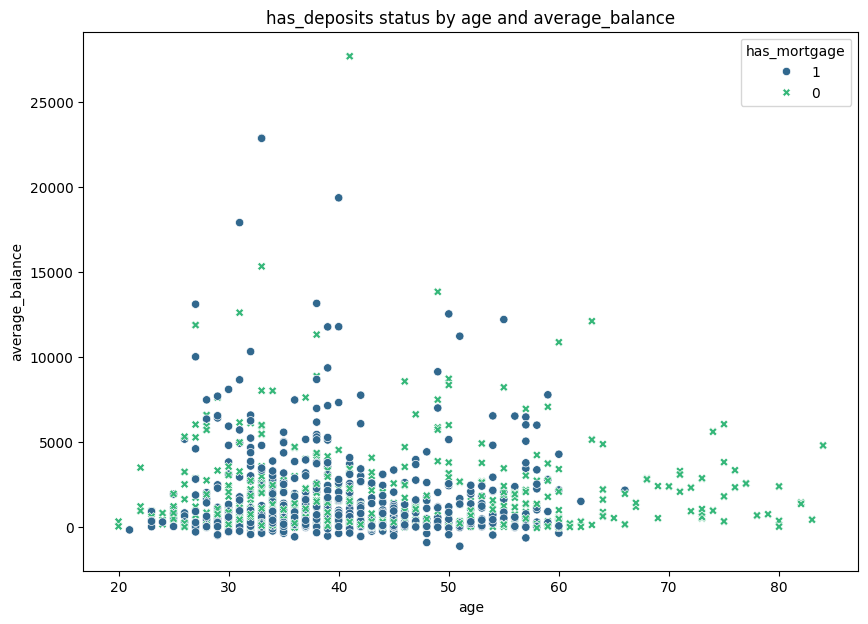

In [46]:
# Scatter plot of contacted_costumers
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_0, x='age', y='average_balance', hue='has_mortgage', style='has_mortgage', palette='viridis')
plt.title('has_deposits status by age and average_balance')
plt.show()

In [47]:
import plotly.express as px

fig = px.histogram(contacted_customers, x="average_balance", color="poutcome", marginal="box", # can be `box`, `violin`
                         hover_data=contacted_customers.columns)
fig.show()

In [49]:
## GETTING RID OF THE OUTLIERS

# calculate IQR for column Height
Q1 = contacted_customers['average_balance'].quantile(0.25)
Q3 = contacted_customers['average_balance'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = contacted_customers[(contacted_customers['average_balance'] < Q1 - threshold * IQR) | (contacted_customers['average_balance'] > Q3 + threshold * IQR)]


In [51]:
# drop rows containing outliers
df_outliers = contacted_customers.drop(outliers.index)


In [52]:
fig = px.histogram(df_outliers, x="average_balance", color="poutcome", marginal="box", # can be `box`, `violin`
                         hover_data=df_outliers.columns)
fig.show()

In [ ]:
px.scatter_3d(df_outliers, x='age', y='average_balance', z='average_balance', color='education')

In [63]:
df_outliers.head()

,client_id,poutcome,average_balance,has_deposits,loan,has_insurance,has_mortgage,age,marital,education,gender
0,249789938,1,2673.410334,1,0,0,0,38,1,secondary,M
2,1952195738,1,2896.273313,1,1,0,0,34,1,secondary,M
3,989726384,1,3115.820938,1,0,0,0,62,1,secondary,F
4,1971878545,0,492.085398,1,0,0,0,36,0,tertiary,M
5,1823731216,0,1835.447820,0,0,1,1,56,0,secondary,F


In [70]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc

In [68]:
# Select features
features = ['education', 'marital', 'age', 'has_mortgage', 'has_insurance', 'loan', 'has_deposits', 'average_balance']

# Split data into train and test sets
X = df_outliers[features]
y = df_outliers['poutcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
# Initialize classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
}

In [72]:
results = []

# Train and evaluate classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    
    results.append({
        "Classifier": name,
        "Accuracy": accuracy,
        "Classification Report": report,
        "FPR": fpr,
        "TPR": tpr,
        "AUC": roc_auc
    })

ValueError: could not convert string to float: 'secondary'